In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from data_loader import DataLoader
from trainer import UnetTrainer
from model import UnetModel
from utils import process_config
from logger import Logger
from PIL import Image

In [2]:
config = process_config('./configs/ipython_viz_config.json')
palette_image = Image.open(config.palette_image)

In [3]:
data = DataLoader(config)
model = UnetModel(config)

Instructions for updating:
Use the retry module or similar alternatives.


In [4]:

with tf.Session() as sess:
    logger = Logger(sess, config)
    trainer = UnetTrainer(sess, model, data, config, logger)
    trainer.train()
    
    



INFO:tensorflow:Restoring parameters from ./experiments/model1/checkpoint/model1-40


Epoch 1/1:   0%|                                                                                 | 0/20 [00:00<?, ?it/s]

Model loaded from checkpoint ./experiments/model1/checkpoint/model1-40


Epoch 1/1: 100%|████████████████████████████████████████████████████████████████████████| 20/20 [02:24<00:00,  7.22s/it]


Global step: 80
Training: loss 35.121604919433594, accuracy 0.015074471943080425
Model saved as ./experiments/model1/checkpoint/model1-80
Test: accuracy 0.008185753598809242


In [5]:
with tf.Session() as sess:
    trainer = UnetTrainer(sess, model, data, config)
    trainer.validate()
    
    

Test: accuracy 0.0053592221811413765


INFO:tensorflow:Restoring parameters from ./experiments/model1/checkpoint/model1-80
Model loaded from checkpoint ./experiments/model1/checkpoint/model1-80
(3024, 4032)


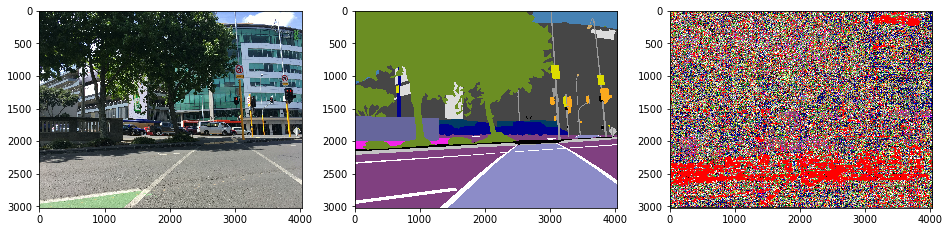

In [8]:
with tf.Session() as sess:
    logger = Logger(sess, config)
    trainer = UnetTrainer(sess, model, data, config, logger)
    sess.run(data.val_iterator.initializer)
    
    orig_x, orig_y, x, y = sess.run(data.val_next)
    
    p = trainer.predict(orig_x, x)
    p = np.squeeze(p[0])
    print(p.shape)
    
    # #     print(orig.shape, img_x.shape, img_y.shape)
    #     img_x = x[1]
    #     img_y = y[1]
    # #     print(img_x.min(), img_x.max(), img_y.min(), img_y.max())

    #     fig = plt.figure(figsize=(32, 32))
    #     img_y = Image.fromarray(np.uint8(np.squeeze(img_y))).quantize(palette=palette_image)
    #     plt.subplot(1, 2, 1)
    #     plt.imshow(np.uint8(img_x))
    #     plt.subplot(1, 2, 2)
    #     plt.imshow(img_y)

    fig = plt.figure(figsize=(16, 16))
    plt.subplot(1, 3, 1)
    plt.imshow(np.uint8(orig_x[0]))
    plt.subplot(1, 3, 2)
    label = Image.fromarray(np.uint8(np.squeeze(orig_y[0]))).quantize(palette=palette_image)
    plt.imshow(label)
    plt.subplot(1, 3, 3)
    img_y = Image.fromarray(np.uint8(p)).quantize(palette=palette_image)
    plt.imshow(img_y)